# EDA and Sentiment Analysis for ice cream reviews of various brands

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Data Collection

In [5]:
df1 = pd.read_csv("/reviews.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21674 entries, 0 to 21673
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand        21674 non-null  object 
 1   key          21674 non-null  object 
 2   author       20874 non-null  object 
 3   date         21674 non-null  object 
 4   stars        21674 non-null  int64  
 5   title        16275 non-null  object 
 6   helpful_yes  21674 non-null  float64
 7   helpful_no   21674 non-null  float64
 8   text         21674 non-null  object 
 9   taste        4265 non-null   float64
 10  ingredients  4265 non-null   float64
 11  texture      4265 non-null   float64
 12  likes        2295 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 2.1+ MB


In [6]:
df2 = pd.read_csv("/products.csv")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         241 non-null    object 
 1   key           241 non-null    object 
 2   name          241 non-null    object 
 3   subhead       57 non-null     object 
 4   description   237 non-null    object 
 5   rating        241 non-null    float64
 6   rating_count  241 non-null    int64  
 7   ingredients   241 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 15.2+ KB


# Exploratory Data Analysis

     brand     stars
3  talenti  4.311624
0       bj  4.305804
2       hd  4.218475
1  breyers  4.027961


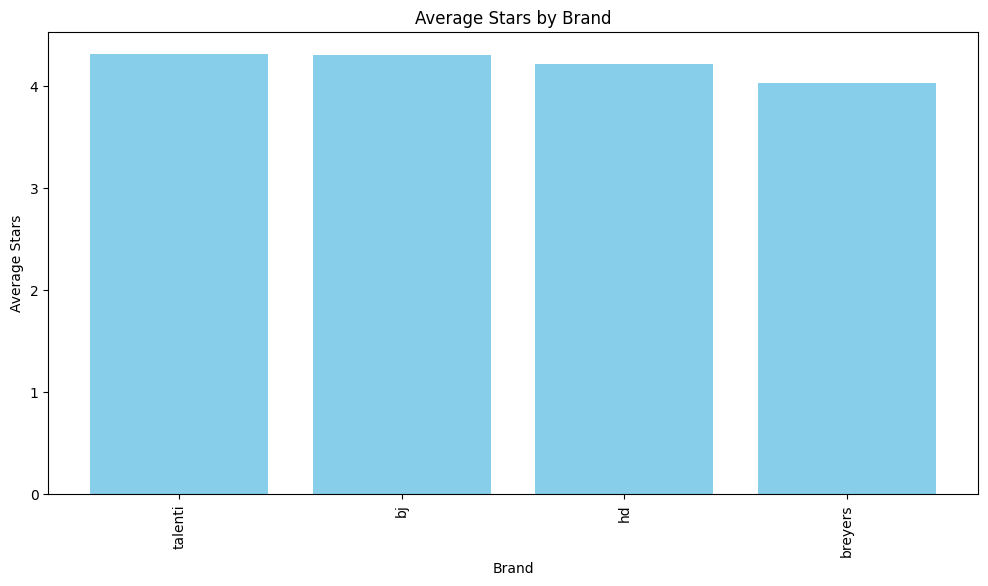

In [7]:
# Group data by brand and calculate the average stars
brand_avg_stars = df1.groupby('brand')['stars'].mean().reset_index()

# Sort the data by average stars in descending order
brand_avg_stars = brand_avg_stars.sort_values(by='stars', ascending=False)

print(brand_avg_stars)

# Create a bar graph
plt.figure(figsize=(12, 6))
plt.bar(brand_avg_stars['brand'], brand_avg_stars['stars'], color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Average Stars')
plt.title('Average Stars by Brand')
plt.xticks(rotation=90)
plt.show()
#This code will group the data by brand, calculate the average stars for each brand, sort the brands by average stars in descending order, and then create a bar graph to visualize the average stars for each brand. Make sure to replace "ice_cream_reviews.csv" with the actual file path to your dataset.








In [8]:
# Group data by brand and calculate the average for taste, ingredients, and texture
# Drop rows with missing data in columns 'taste', 'ingredients', and 'texture'
data_cleaned = df1.dropna(subset=['taste', 'ingredients', 'texture'])
brand_avg_ratings = data_cleaned.groupby('brand')[['taste', 'ingredients', 'texture']].mean().reset_index()
print(brand_avg_ratings)


  brand     taste  ingredients   texture
0    hd  4.234701     4.323798  4.284642


        aspect    rating
0        taste  4.234701
1  ingredients  4.323798
2      texture  4.284642


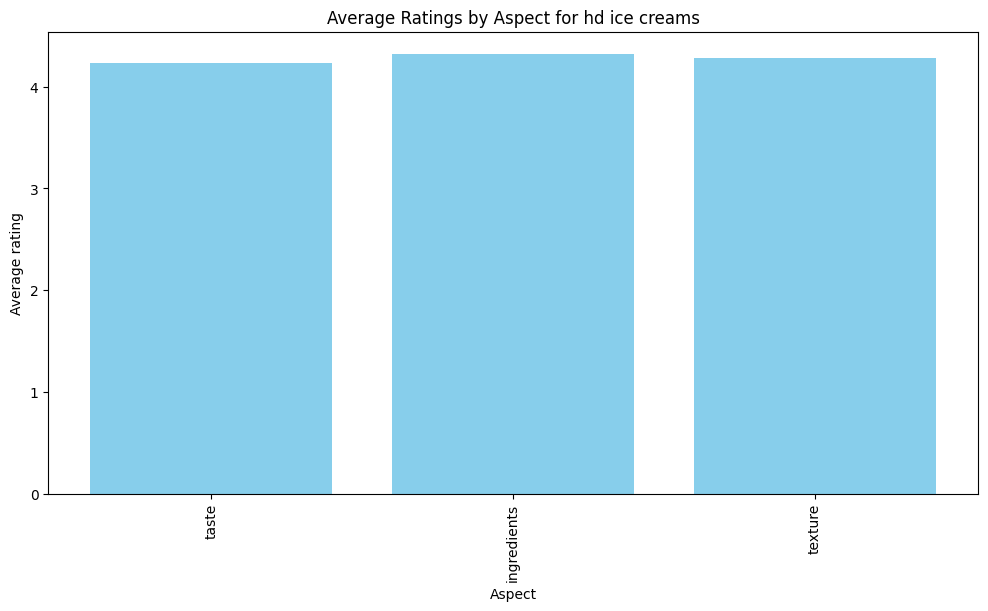

In [9]:
# Melt the DataFrame to convert it to the desired format
melted_df = brand_avg_ratings.melt(id_vars=['brand'], var_name='aspect', value_name='rating')

# Drop the 'brand' column if you no longer need it
melted_df = melted_df.drop(columns=['brand'])

# Print the resulting DataFrame
print(melted_df)

plt.figure(figsize=(12, 6))
plt.bar(melted_df['aspect'], melted_df['rating'], color='skyblue')
plt.xlabel('Aspect')
plt.ylabel('Average rating')
plt.title('Average Ratings by Aspect for hd ice creams')
plt.xticks(rotation=90)
plt.show()


# Sentiment Analysis

In [10]:
# Initialize the Sentiment Intensity Analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Load your dataset
data = pd.read_csv("/reviews.csv")

# Function to perform sentiment analysis on a text
def perform_sentiment_analysis(text):
    sentiment_scores = analyzer.polarity_scores(text)
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to 'title' and 'text' columns and store results in new columns
data['title_sentiment'] = data['title'].fillna("").apply(perform_sentiment_analysis)
data['text_sentiment'] = data['text'].fillna("").apply(perform_sentiment_analysis)

# Example: Apply sentiment analysis to 'likes' column (assuming 'likes' contains text)
data['likes_sentiment'] = data['likes'].fillna("").apply(perform_sentiment_analysis)

# Save the updated dataset with sentiment analysis results
data.to_csv("ice_cream_reviews_with_sentiment.csv", index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [13]:
data['title_sentiment'].value_counts()

neutral     9902
positive    9674
negative    2098
Name: title_sentiment, dtype: int64

In [14]:
data['text_sentiment'].value_counts()

positive    18729
negative     2327
neutral       618
Name: text_sentiment, dtype: int64

In [15]:
data['likes_sentiment'].value_counts()

neutral     19699
positive     1975
Name: likes_sentiment, dtype: int64

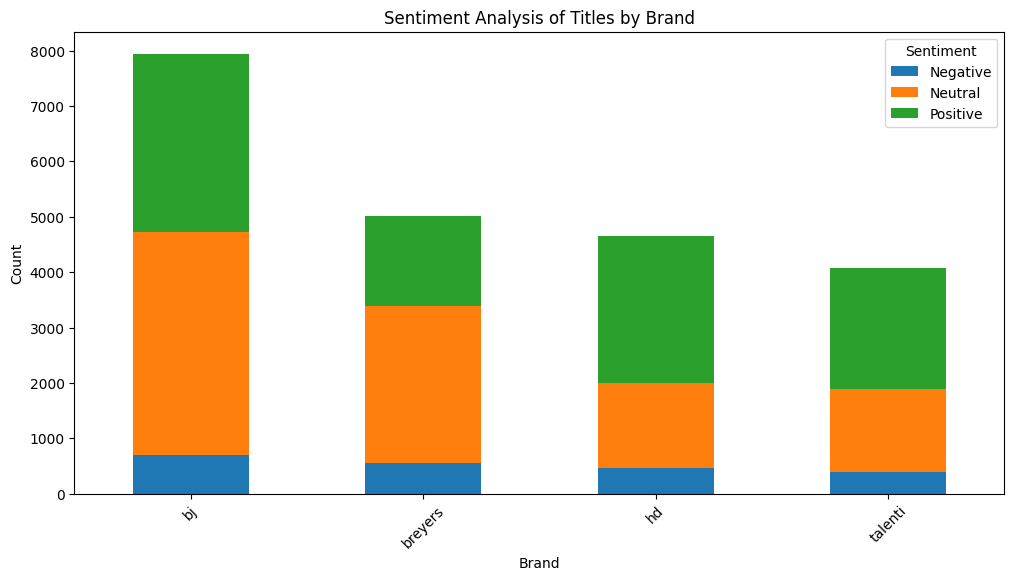

In [16]:


# Group data by brand and calculate the count of each sentiment
brand_sentiment_counts = data.groupby(['brand', 'title_sentiment']).size().unstack(fill_value=0)

# Create a stacked bar plot
brand_sentiment_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Sentiment Analysis of Titles by Brand')
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])
plt.xticks(rotation=45)
plt.show()


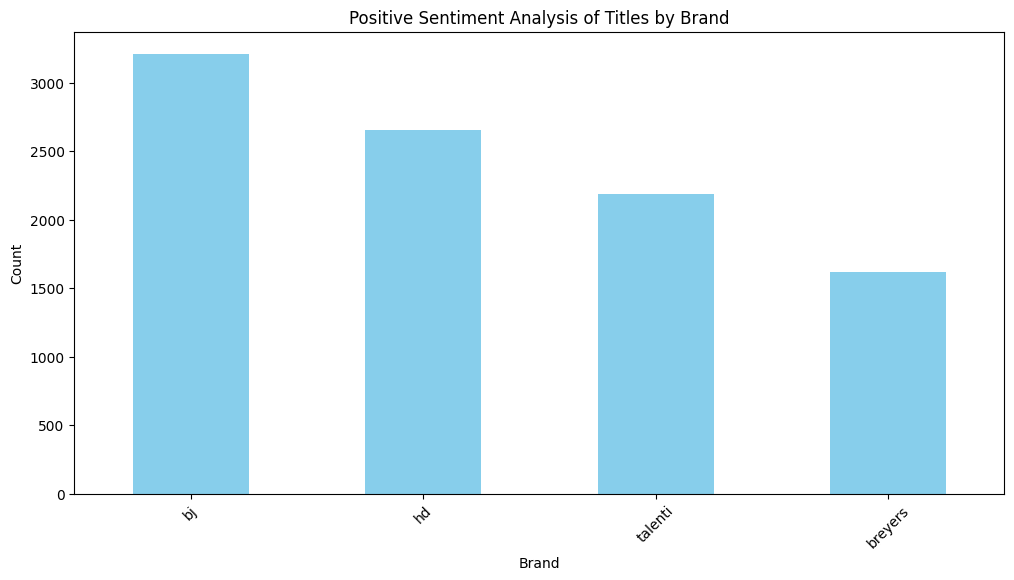

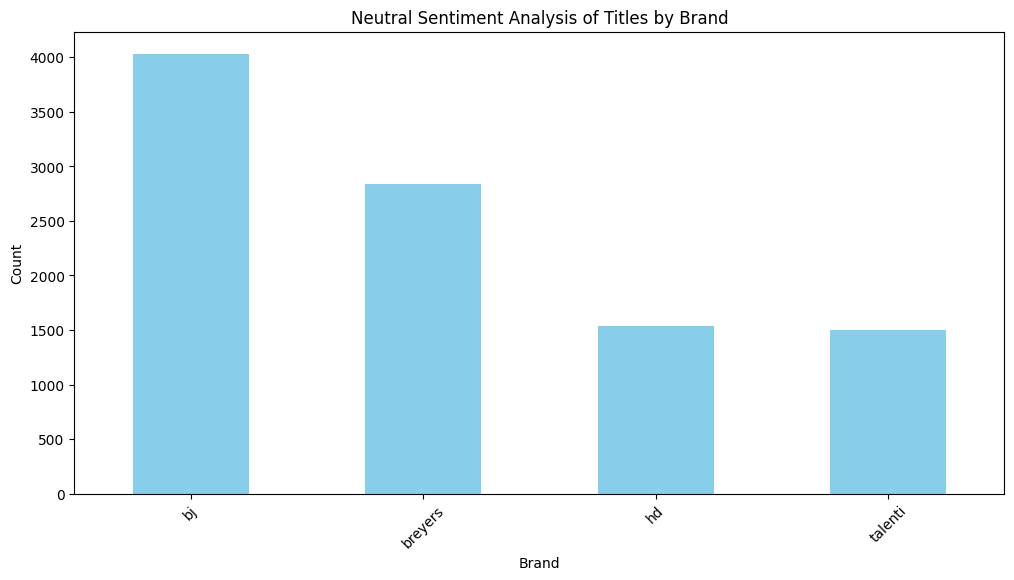

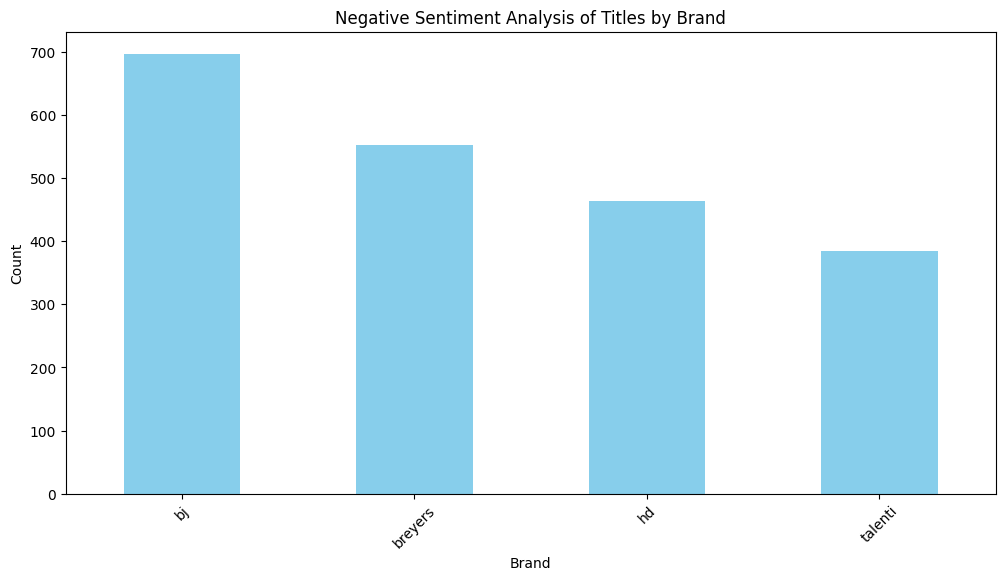

In [17]:
# Group data by brand and sentiment and calculate the count
brand_sentiment_counts = data.groupby(['brand', 'title_sentiment']).size().unstack(fill_value=0)

# Sort brands by the total count of each sentiment in descending order
brand_sentiment_counts['Total'] = brand_sentiment_counts.sum(axis=1)
brand_sentiment_counts = brand_sentiment_counts.sort_values(by=['Total'], ascending=False)
brand_sentiment_counts = brand_sentiment_counts.drop('Total', axis=1)

# Create separate bar plots for each sentiment
sentiments = ['positive', 'neutral', 'negative']

for sentiment in sentiments:
    plt.figure(figsize=(12, 6))
    sorted_brands = brand_sentiment_counts[sentiment].sort_values(ascending=False)
    sorted_brands.plot(kind='bar', color='skyblue')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.title(f'{sentiment.capitalize()} Sentiment Analysis of Titles by Brand')
    plt.xticks(rotation=45)
    plt.show()